# Лабораторная работа №5.

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from csv import writer
from PIL import Image, ImageDraw, ImageFont, ImageChops

### Задание 1. Удаление белого фона

In [2]:
def letter_vert_trim(img):
    old = np.asarray(img)   
    rows, cols = old.shape
    new = np.zeros( (rows, cols) )            
    
    curr_row = 0
    for i in range(rows):
        flag = 0
        for j in range(cols):
            new[curr_row][j] = old[i][j]
            if old[i][j] < 255:
                #в строке найден кусочек буквы
                flag = 1
        if flag == 0:
            #удаление пустой строки
            new = np.delete(new, curr_row, 0)
        else:
            curr_row += 1
            
    new = new.astype(np.uint8)
    img_res = Image.fromarray(new)
    return img_res

In [3]:
def letter_hor_trim(img):
    old = np.asarray(img)   
    rows, cols = old.shape
    new = np.zeros( (rows, cols) )            
    
    curr_col = 0
    for j in range(cols):
        flag = 0
        for i in range(rows):
            new[i][curr_col] = old[i][j]
            if old[i][j] < 255:
                #в строке найден кусочек буквы
                flag = 1
        if flag == 0:
            #удаление пустой строки
            new = np.delete(new, curr_col, 1)
        else:
            curr_col += 1
            
    new = new.astype(np.uint8)
    img_res = Image.fromarray(new)
    return img_res

In [4]:
fnt = ImageFont.truetype("times.ttf", 52, encoding="unic")
img = Image.new('L', (1000, 200), color='white')
d = ImageDraw.Draw(img)
d.text((0,0), 'η ποιότητα δεν είναι πράξη, είναι συνήθεια', font=fnt, fill=0, align="center")
    
img = letter_vert_trim(img)
    
img.save("lab5_text1.bmp")

In [5]:
fnt = ImageFont.truetype("times.ttf", 52, encoding="unic")
img = Image.new('L', (1000, 200), color='white')
d = ImageDraw.Draw(img)
d.text((0,0), 'εν οίδα ότι ουδέν οίδα', font=fnt, fill=0, align="center")
    
img = letter_vert_trim(img)
    
img.save("lab5_text2.bmp")

In [6]:
img1 = Image.open("lab5_text1.bmp")

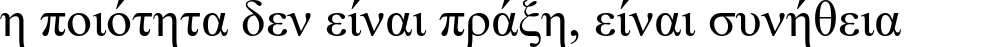

In [7]:
img1

In [8]:
img2 = Image.open("lab5_text2.bmp")

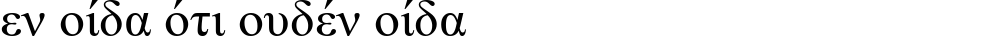

In [9]:
img2

### Задание 2. Горизонтальный и вертикальный профиль строки

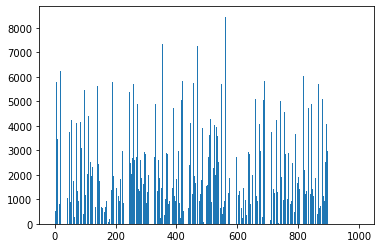

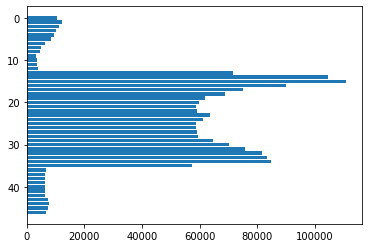

In [13]:
vert_profile(img1)
horizon_profile(img1)

In [11]:
# вертикальный профиль
def vert_profile(img):
    arr = np.asarray(img)   
    rows, cols = arr.shape
    
    cols_results = []
    for j in range(cols):
        cols_sum = 0
        for i in range(rows):
            cols_sum += (255 - arr[i][j])
        cols_results.append(cols_sum)
    
    x = np.arange(cols)
    plt.bar(x,cols_results)
    plt.show()

In [12]:
# горизонатльный профиль
def horizon_profile(img):
    arr = np.asarray(img)   
    rows, cols = arr.shape
    
    rows_results = []
    for i in range(rows):
        rows_sum = 0
        for j in range(cols):
            rows_sum += (255 - arr[i][j])
        rows_results.append(rows_sum)
        
    y = np.arange(rows)
    plt.barh(y, rows_results)
    plt.gca().invert_yaxis()
    plt.show()

### Задание 3. Сегментация символов в строке

In [14]:
def segmentation(img):
    arr = np.asarray(img)   
    rows, cols = arr.shape
    
    
    flag = 0
    x = []
    for j in range(cols):
        cols_sum = 0
        for i in range(rows):
            cols_sum += (255 - arr[i][j])
        #print(cols_sum)
        if cols_sum != 0 and flag == 0:
            flag = 1
            x.append(j)
        elif cols_sum == 0 and flag == 1:
            flag = 0
            x.append(j - 1)
    #print(x)
    
    xy = [[],[]]
    for i in range(1,len(x),2):
        left = x[i - 1]
        right = x[i]        
        y = []
        flag = 0
        for i in range(rows):
            rows_sum = 0
            for j in range(left, right):
                rows_sum += (255 - arr[i][j])
            if rows_sum != 0 and flag == 0:
                flag = 1
                y.append(i)
            elif rows_sum == 0 and flag == 1:
                flag = 0
                y.append(i - 1)
            elif rows_sum != 0 and (i == 0 or i == rows - 1):
                flag = 1
                y.append(i)
                
        #print(left,right,y)
        
        for i in range(1,len(y),2):
            xy[0].append(left)
            xy[1].append(y[i-1])
            xy[0].append(left)
            xy[1].append(y[i])
            xy[0].append(right)
            xy[1].append(y[i-1])
            xy[0].append(right)
            xy[1].append(y[i])
    
    return xy    

In [15]:
xy1 = segmentation(img1)
xy2 = segmentation(img2)

In [16]:
img_res = img1.copy()
img_res.convert('RGB')
for i in range(0,len(xy1[0]),4):        
    shape = [(xy1[0][i], xy1[1][i]), (xy1[0][i+3], xy1[1][i+3])]
    img = ImageDraw.Draw(img_res)  
    img.rectangle(shape, outline ="green")
img_res.save("lab5_text1_segmentation.bmp")

In [17]:
img_res = img2.copy()
img_res.convert('RGB')
for i in range(0,len(xy2[0]),4):        
    shape = [(xy2[0][i], xy2[1][i]), (xy2[0][i+3], xy2[1][i+3])]
    img = ImageDraw.Draw(img_res)  
    img.rectangle(shape, outline ="green")
img_res.save("lab5_text2_segmentation.bmp")

# Лабораторная работа №6.

In [18]:
def euclidean_similarity(a,b):
    dist = 0
    if len(a) == len(b):
        for i in range(len(a)):
            dist += (a[i] - b [i])**2
        dist = dist**(1 / 2)
    similarity = 1 - dist
    return similarity

In [19]:
def metrics(img,x1,y1,x2,y2):
    img = img.convert('1')
    arr = np.asarray(img)   
    rows, cols = arr.shape
    
    #вес черного
    weight = 0
    for i in range(y1, y2 + 1):
        for j in range(x1, x2 + 1):
            #print(i,j)
            #print(arr[i][j])
            weight += (1 - arr[i][j])

    #удельный вес черного
    norm_weight = weight / ((x2 - x1 + 1) * (y2 - y1 + 1))
    
    #координаты центра тяжести
    center_x = 0
    center_y = 0
    for i in range(y1, y2 + 1):
        for j in range(x1, x2 + 1):
            center_x += ((j - x1) * (1 - arr[i][j]))
            center_y += ((i - y1) * (1 - arr[i][j]))
    center_x = center_x / weight
    center_y = center_y / weight
    
    #нормированные координаты центра тяжести
    norm_center_x = (center_x - 1) / (x2 - x1)
    norm_center_y = (center_y - 1) / (y2 - y1)
    
    #осевые моменты инерции по горизонтали и вертикали
    inertia_x = 0
    inertia_y = 0
    for i in range(y1, y2 + 1):
        for j in range(x1, x2 + 1):
            inertia_x += (i - y1 - center_y)**2 * (1 - arr[i][j])
            inertia_y += (j - x1 - center_x)**2 * (1 - arr[i][j])
            
    #нормированные осевые моменты инерции
    norm_inertia_x = inertia_x / weight**2
    norm_inertia_y = inertia_y / weight**2
    #print(inertia_x, inertia_y, norm_inertia_x, norm_inertia_y)
    
    metrics = [norm_weight, norm_center_x, norm_center_y, norm_inertia_x, norm_inertia_y]
    return metrics

In [20]:
def by_similarity(ele):
    return ele[1]

In [21]:
def similarity_res(alphabet, xy, img, img_segmentation, name):
    all_metrics = pd.read_csv(alphabet, header=0) 

    total = []
    for i in range(0,len(xy[0]),4):
        if (xy[1][i+3] - xy[1][i]) > 20:
            metrics1 = metrics(img, xy[0][i], xy[1][i], xy[0][i+3], xy[1][i+3])
    
            result = []
            for j in range(0,len(all_metrics)):
                metrics2 = all_metrics.iloc[j,[2,5,6,9,10]]
                similarity = euclidean_similarity(metrics1,metrics2)
                pair = (all_metrics.iloc[j,0], similarity)
                result.append(pair)
        
            result = sorted(result, key=by_similarity, reverse=True)
            total.append(result)
            #print(result)
            with open('lab6_result' + name + '.csv', 'a+', newline='') as write_obj:
                csv_writer = writer(write_obj)
                csv_writer.writerow(result)
                #print(result) 
                
    width, high = img_segmentation.size
    new_im = Image.new('L', (width, 2*high), color='white')
    
    new_im.paste(img_segmentation, (0,0))
    
    j = 0
    for i in range(0,len(xy[0]),4):
        if (xy[1][i+3] - xy[1][i]) > 20:
            im1 = Image.open('alphabet\\' + total[j][0][0] + '.bmp')
            j += 1
            
            x, y = im1.size
            new_im.paste(im1, (xy[0][i], high + high // 2 - y // 2))
    
    new_im.save('lab6_result' + name + '.bmp')

## Пример 1.

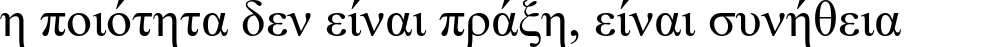

In [28]:
img1

In [29]:
img1.size[1]

47

In [30]:
img1_sgmnt = Image.open("lab5_text1_segmentation.bmp")
similarity_res('lab4_result.csv', xy1, img1, img1_sgmnt, '1')
img1_res = Image.open("lab6_result1.bmp")

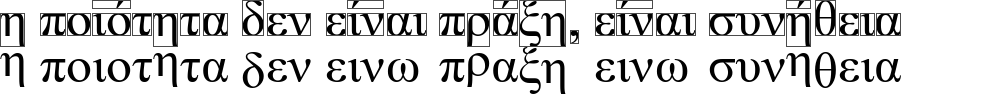

In [31]:
img1_res

In [32]:
res1 = pd.read_csv('lab6_result1.csv', header=None)

In [33]:
res1

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,"('h', 0.9999999999999999)","('t', 0.8769581631968322)","('n', 0.8723336641653168)","('ph', 0.8574528711840508)","('ps', 0.8570729347659859)","('u', 0.8439175162006678)","('p', 0.8332401028424898)","('s', 0.8229409763743647)","('th', 0.8162567242934582)","('e', 0.8079279980456104)",...,"('in', 0.7119795939350512)","('w', 0.7053330592279169)","('xh', 0.6995351934596006)","('io', 0.6966728048095454)","('g', 0.6841083612023955)","('l', 0.6299951537376766)","('en', 0.5872246945766051)","('x', 0.49441527509880245)","('z', 0.32136998478942047)","('sun', 0.2902588498485976)"
1,"('p', 0.9999999999999999)","('th', 0.9143933566694469)","('s', 0.9111383483561446)","('a', 0.9055474732565277)","('k', 0.8956886666930464)","('u', 0.8889070735339237)","('o', 0.8862309154541451)","('e', 0.8732690643342286)","('ph', 0.8678441310954936)","('n', 0.849938443327742)",...,"('i', 0.7329940652799576)","('ch', 0.7326369685074288)","('in', 0.7319173463160552)","('xh', 0.6705231976485391)","('en', 0.6053757915723453)","('l', 0.5956848680777749)","('g', 0.5827144661470042)","('x', 0.4122508113927231)","('sun', 0.2981106849060755)","('z', 0.24281176882485456)"
2,"('o', 0.9965806430725803)","('u', 0.942813835192723)","('a', 0.9315391715650007)","('s', 0.9203206908625472)","('k', 0.915994847633051)","('p', 0.8862297667311234)","('w', 0.8736639984233473)","('th', 0.8655951929705777)","('ph', 0.8654044733010656)","('n', 0.8598720580431094)",...,"('t', 0.7479055036594324)","('b', 0.7477363422499821)","('en', 0.7084019157104163)","('ch', 0.6996455095660548)","('i', 0.6765044937521836)","('l', 0.5921900913730334)","('g', 0.5477867367814144)","('sun', 0.3969722256512165)","('x', 0.38632024546810284)","('z', 0.22127079148339235)"
3,"('io', 0.9999999999999999)","('w', 0.9531749710389383)","('in', 0.9199314712252004)","('o', 0.8412667779593923)","('en', 0.8398974799770549)","('u', 0.8301670622115113)","('xh', 0.8136872576165375)","('s', 0.8015689480073724)","('a', 0.791314779309432)","('k', 0.7659173909160022)",...,"('d', 0.6375530710181414)","('t', 0.6131099937360917)","('b', 0.6083830475455718)","('ch', 0.5744610128189558)","('sun', 0.5410259165192861)","('i', 0.533754428250369)","('l', 0.49087993457033663)","('g', 0.4461039150481392)","('x', 0.29166211874539716)","('z', 0.13360670191351054)"
4,"('t', 1.0)","('h', 0.8769581631968322)","('b', 0.8679877567639794)","('d', 0.8435724511478611)","('i', 0.8411765452586877)","('ch', 0.8398469051266217)","('th', 0.8353470269322361)","('e', 0.8321053072451616)","('p', 0.8231702396982779)","('r', 0.8206096854638354)",...,"('g', 0.7404257530811345)","('l', 0.6832702779337346)","('w', 0.6329253045534214)","('in', 0.6302471067196996)","('xh', 0.6198049495635158)","('io', 0.6131099937360915)","('x', 0.5525074946232533)","('en', 0.5043174841403408)","('z', 0.3798859012152802)","('sun', 0.2001812472982618)"
5,"('h', 0.9999999999999999)","('t', 0.8769581631968322)","('n', 0.8723336641653168)","('ph', 0.8574528711840508)","('ps', 0.8570729347659859)","('u', 0.8439175162006678)","('p', 0.8332401028424898)","('s', 0.8229409763743647)","('th', 0.8162567242934582)","('e', 0.8079279980456104)",...,"('in', 0.7119795939350512)","('w', 0.7053330592279169)","('xh', 0.6995351934596006)","('io', 0.6966728048095454)","('g', 0.6841083612023955)","('l', 0.6299951537376766)","('en', 0.5872246945766051)","('x', 0.49441527509880245)","('z', 0.32136998478942047)","('sun', 0.2902588498485976)"
6,"('t', 1.0)","('h', 0.8769581631968322)","('b', 0.8679877567639794)","('d', 0.8435724511478611)","('i', 0.8411765452586877)","('ch', 0.8398469051266217)","('th', 0.8353470269322361)","('e', 0.8321053072451616)","('p', 0.8231702396982779)","('r', 0.8206096854638354)",...,"('g', 0.7404257530811345)","('l', 0.6832702779337346)","('w', 0.6329253045534214)","('in', 0.6302471067196996)","('xh', 0.6198049495635158)","('io', 0.6131099937360915)","('x', 0.5525074946232533)","('en', 0.5043174841403408)","('z', 0.37

## Пример 2.

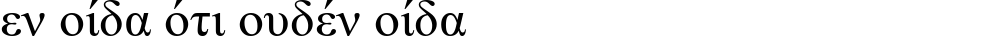

In [22]:
img2

In [23]:
img2.size

(1000, 36)

In [24]:
img2_sgmnt = Image.open("lab5_text2_segmentation.bmp")
similarity_res('lab4_result.csv', xy2, img2, img2_sgmnt, '2')
img2_res = Image.open("lab6_result2.bmp")

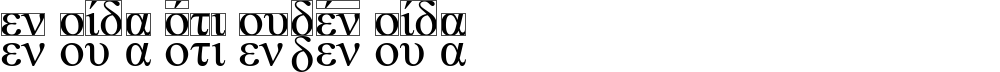

In [25]:
img2_res

In [26]:
res2 = pd.read_csv('lab6_result2.csv', header=None)

In [27]:
res2

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,"('en', 0.9999999999999999)","('in', 0.862585824251564)","('io', 0.8398974799770549)","('w', 0.8071487953073123)","('xh', 0.7702418902692253)","('o', 0.7081137963289186)","('u', 0.6961942093709061)","('s', 0.6834074564592958)","('sun', 0.6828863918068981)","('n', 0.6630983192148355)",...,"('th', 0.5858951304053912)","('d', 0.5295774553497561)","('b', 0.5152451880789999)","('t', 0.5043174841403408)","('ch', 0.48209475184474027)","('i', 0.4278824411310823)","('l', 0.4221073086028865)","('g', 0.3885396096704107)","('x', 0.2364723362865926)","('z', 0.09332282389935209)"
1,"('o', 0.9999999999999999)","('u', 0.9456253141999617)","('a', 0.9292776520882693)","('s', 0.9194507972291776)","('k', 0.9160021834279927)","('p', 0.886230915454145)","('w', 0.8734604625637284)","('th', 0.8664268344337823)","('ph', 0.8661294997022617)","('n', 0.8613576912181983)",...,"('t', 0.7494438844576714)","('b', 0.7487864662294578)","('en', 0.7081137963289186)","('ch', 0.7015351640775698)","('i', 0.6779471431690398)","('l', 0.5940977311150626)","('g', 0.5496903902527874)","('sun', 0.3965435688583723)","('x', 0.3884544952752037)","('z', 0.22327176687059846)"
2,"('u', 0.8873786149874838)","('o', 0.8675106404545604)","('xh', 0.8467505037639862)","('k', 0.8448631599623806)","('e', 0.8361952783241736)","('n', 0.8317944508728112)","('th', 0.8285756869624794)","('w', 0.824899551446113)","('d', 0.8159004681715664)","('a', 0.812714447225155)",...,"('b', 0.7507388649118099)","('ch', 0.7465954642369734)","('t', 0.7455755382399004)","('i', 0.7007947810237556)","('en', 0.6852283027642698)","('l', 0.6662780069297964)","('g', 0.5950004801604891)","('x', 0.46232471936799635)","('sun', 0.38253843096411233)","('z', 0.29794150455109103)"
3,"('a', 1.0)","('o', 0.9292776520882693)","('k', 0.9175764404254029)","('p', 0.9055474732565277)","('s', 0.9028157536704162)","('u', 0.8876687334631571)","('th', 0.8817526520903582)","('e', 0.8591525808112226)","('m', 0.839953035882357)","('ph', 0.832940696379693)",...,"('t', 0.7423897710077543)","('xh', 0.6993854279757794)","('ch', 0.6895188694639394)","('i', 0.6815443946973105)","('en', 0.6595952736221833)","('l', 0.5767713856564826)","('g', 0.5257199252204103)","('x', 0.3691951031320011)","('sun', 0.35438795625543995)","('z', 0.20504729319576764)"
4,"('o', 0.9999999999999999)","('u', 0.9456253141999617)","('a', 0.9292776520882693)","('s', 0.9194507972291776)","('k', 0.9160021834279927)","('p', 0.886230915454145)","('w', 0.8734604625637284)","('th', 0.8664268344337823)","('ph', 0.8661294997022617)","('n', 0.8613576912181983)",...,"('t', 0.7494438844576714)","('b', 0.7487864662294578)","('en', 0.7081137963289186)","('ch', 0.7015351640775698)","('i', 0.6779471431690398)","('l', 0.5940977311150626)","('g', 0.5496903902527874)","('sun', 0.3965435688583723)","('x', 0.3884544952752037)","('z', 0.22327176687059846)"
5,"('t', 1.0)","('h', 0.8769581631968322)","('b', 0.8679877567639794)","('d', 0.8435724511478611)","('i', 0.8411765452586877)","('ch', 0.8398469051266217)","('th', 0.8353470269322361)","('e', 0.8321053072451616)","('p', 0.8231702396982779)","('r', 0.8206096854638354)",...,"('g', 0.7404257530811345)","('l', 0.6832702779337346)","('w', 0.6329253045534214)","('in', 0.6302471067196996)","('xh', 0.6198049495635158)","('io', 0.6131099937360915)","('x', 0.5525074946232533)","('en', 0.5043174841403408)","('z', 0.3798859012152802)","('sun', 0.2001812472982618)"
6,"('i', 0.9999999999999999)","('ch', 0.9089041866794828)","('b', 0.8919555677215196)","('d', 0.8712270624835361)","('t', 0.8411765452586877)","('e', 0.8082433639245012)","('l', 0.7940040774246239)","('th', 0.7932679933628697)","('r', 0.7852327115443751)","('m', 0.7592862711495839)",...,"('o', 0.6779471431690398)","('s', 0.6752774975862976)","('x', 0.6284573741667856)","('xh', 0.5745617350918519)","('w', 0.5634095259749107)","('in', 0.5477696956252454)","('io', 0.533754428250369)","('z', 0.46184303267026217)","('en', 0.42788244113